1. Descriptive Analytics: Exploratory Data Analysis 


Data Summary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Airbnb_Data.csv")

In [2]:
# Display basic information about the dataset
print("Dataset Summary:")
print(df.info())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verifie

In [3]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.8

Plot Charts and discover trends/insights

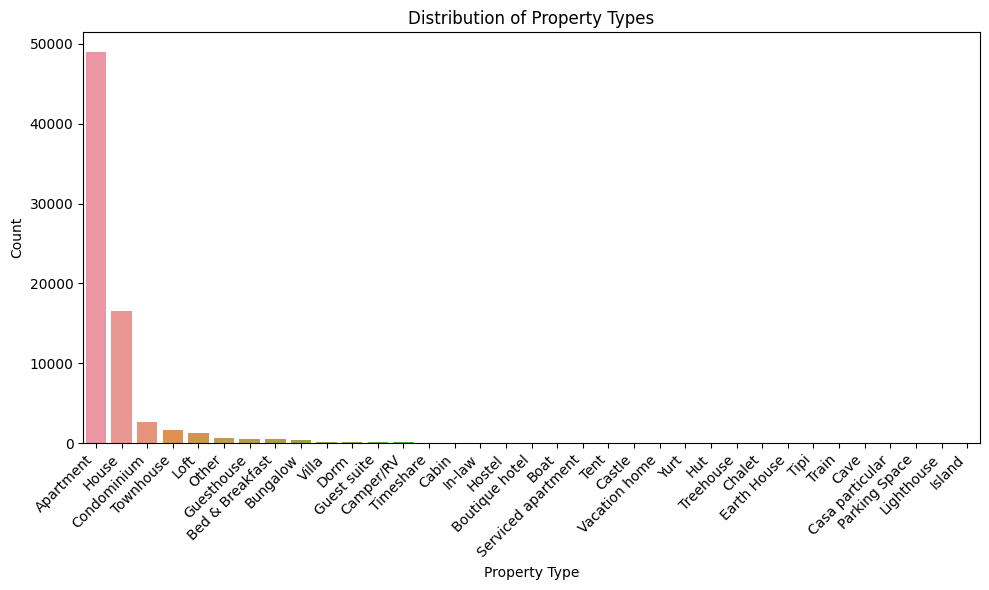

In [4]:
# 1. Distribution of property types
plt.figure(figsize=(10, 6))
sns.countplot(x='property_type', data=df, order=df['property_type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

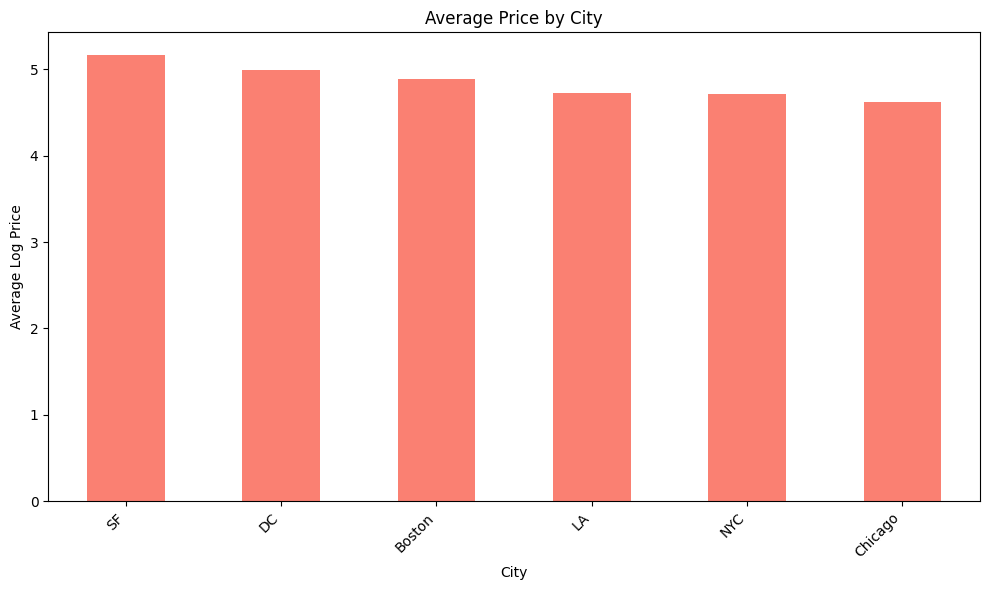

In [5]:
# 2. Average price by city
avg_price_city = df.groupby('city')['log_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_price_city.plot(kind='bar', color='salmon')
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Log Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

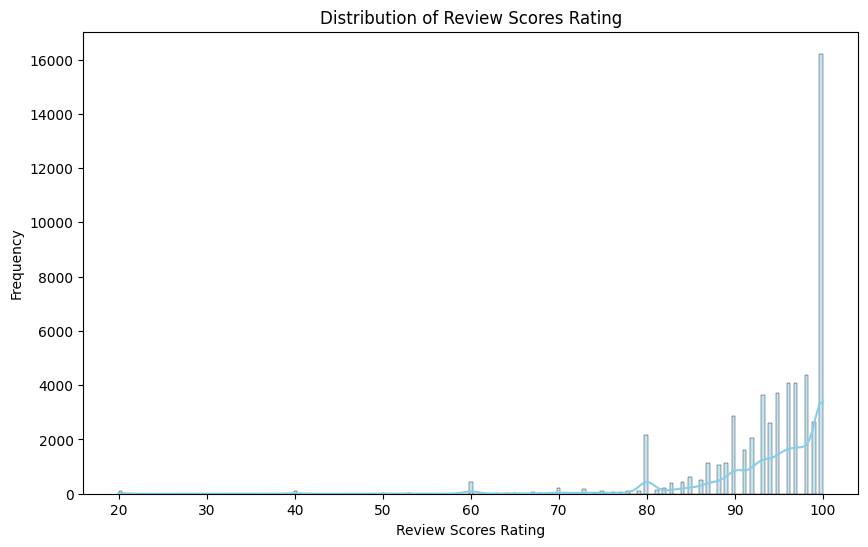

In [6]:
# 3. Distribution of review scores rating
plt.figure(figsize=(10, 6))
sns.histplot(df['review_scores_rating'], kde=True, color='skyblue')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.show()

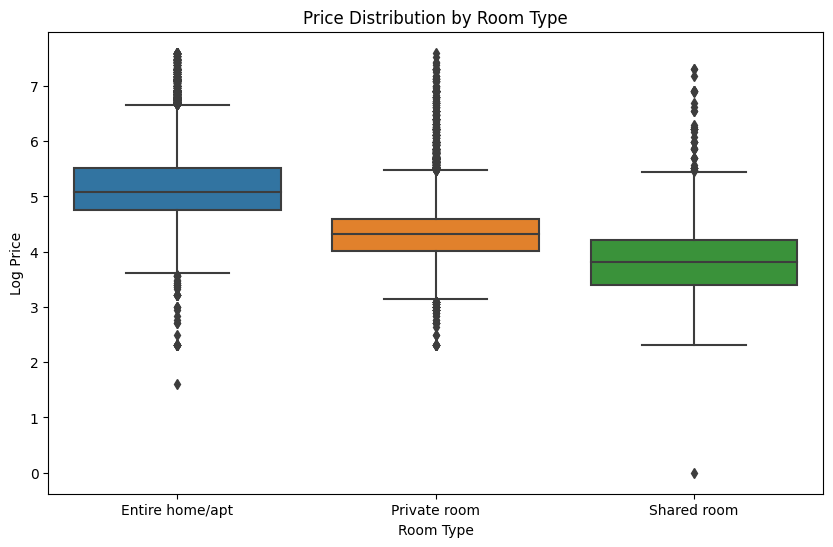

In [7]:
# 4. Relationship between price and room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='log_price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log Price')
plt.show()

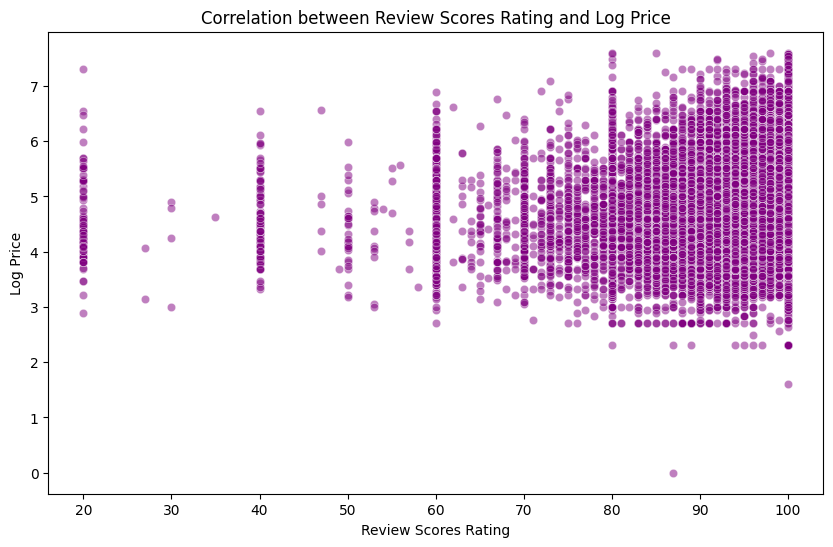

In [8]:
# 5. Correlation between Price and Review Scores Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='log_price', data=df, color='purple', alpha=0.5)
plt.title('Correlation between Review Scores Rating and Log Price')
plt.xlabel('Review Scores Rating')
plt.ylabel('Log Price')
plt.show()

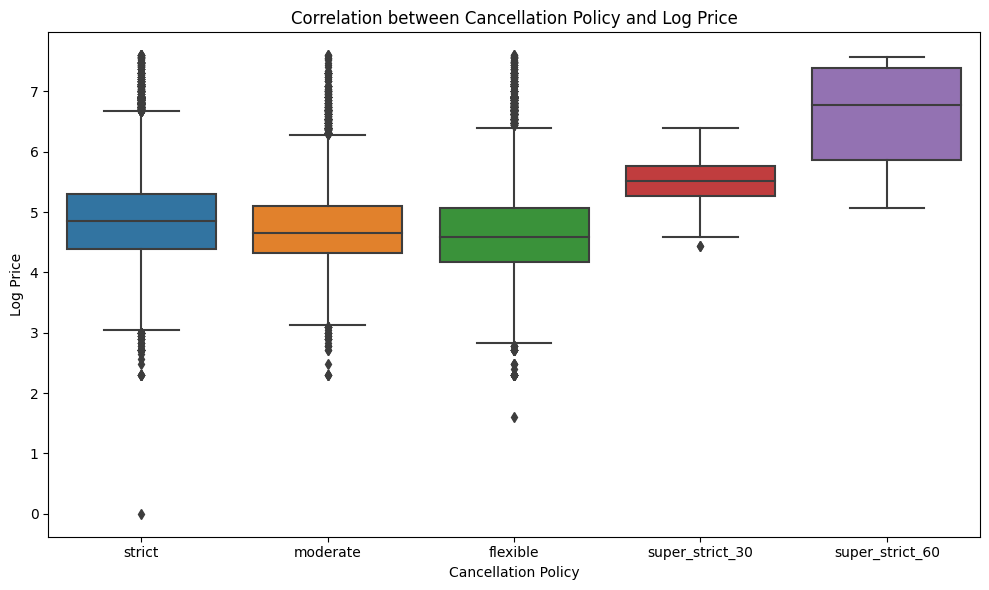

In [9]:
# 6. Correlation between Price and Cancellation Policy
plt.figure(figsize=(10, 6))
sns.boxplot(x='cancellation_policy', y='log_price', data=df)
plt.title('Correlation between Cancellation Policy and Log Price')
plt.xlabel('Cancellation Policy')
plt.ylabel('Log Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

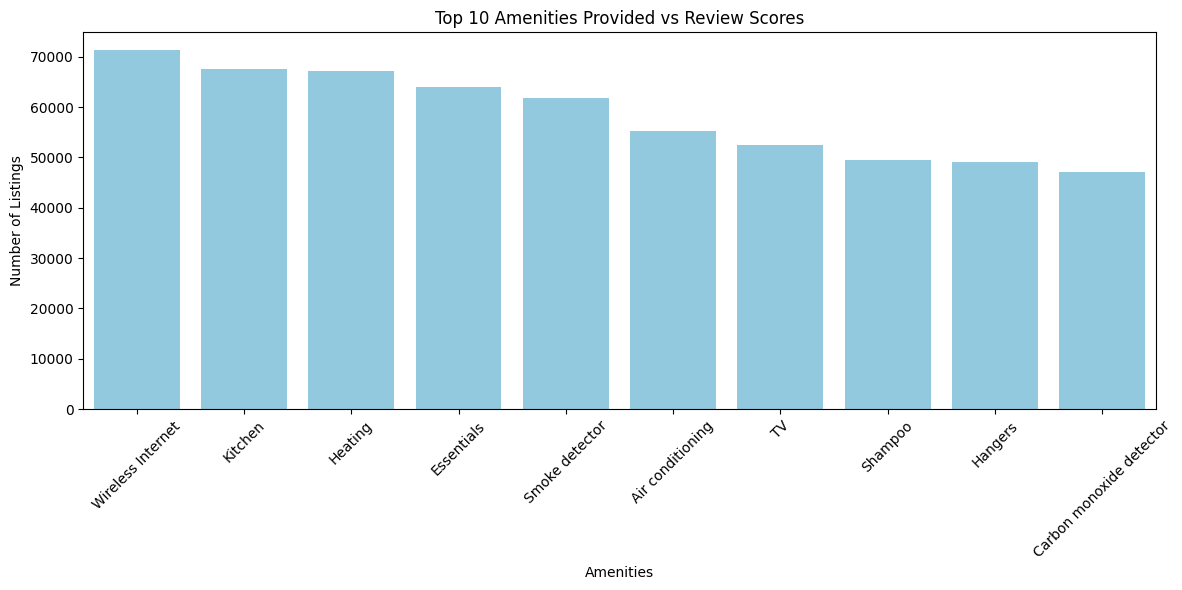

In [10]:
# 7. Top 10 Amenities Provided
# Exclude listings with no amenities
df['amenities'] = df['amenities'].str.strip('{}').str.replace('"', '').str.split(',')
df['amenities_count'] = df['amenities'].apply(len)
df_with_amenities = df[df['amenities_count'] > 0]

# Calculate counts of each amenity
amenities_counts = {}
for row in df_with_amenities['amenities']:
    for amenity in row:
        if amenity in amenities_counts:
            amenities_counts[amenity] += 1
        else:
            amenities_counts[amenity] = 1

# Sort amenities by count in descending order
sorted_amenities_counts = dict(sorted(amenities_counts.items(), key=lambda item: item[1], reverse=True)[:10])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(sorted_amenities_counts.keys()), y=list(sorted_amenities_counts.values()), color='skyblue')
plt.title('Top 10 Amenities Provided vs Review Scores')
plt.xlabel('Amenities')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


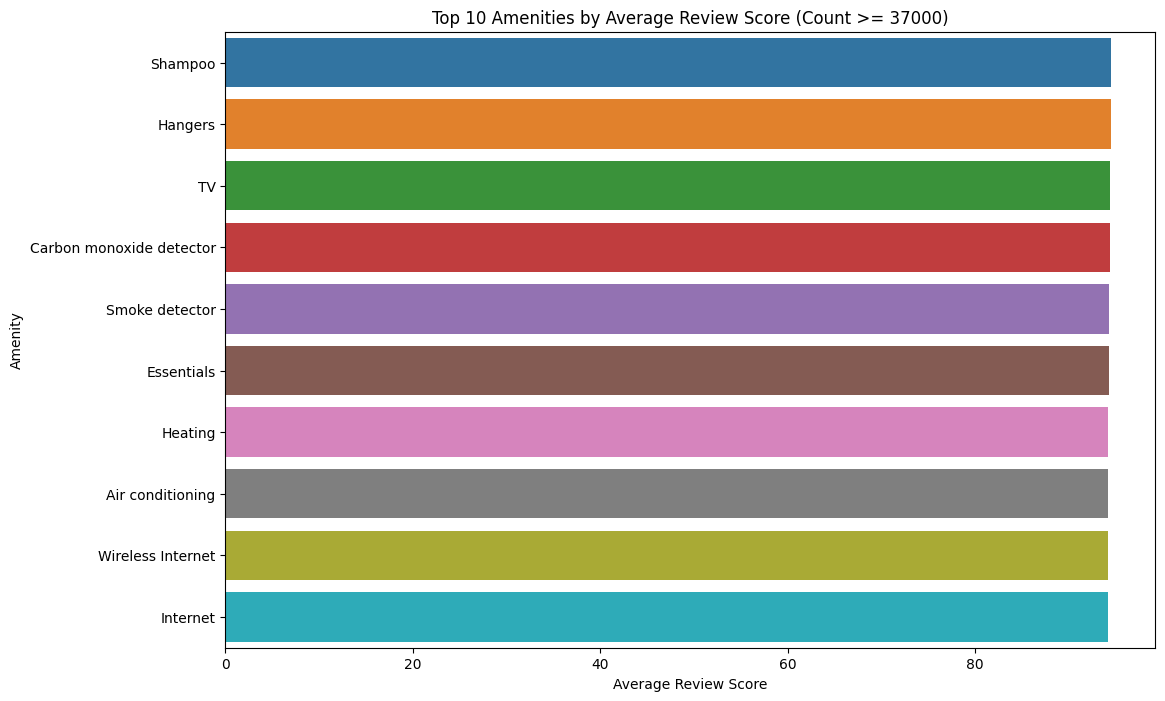

In [11]:
# 8. Effects on common amenities on review score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Airbnb_Data.csv")

# Drop rows with missing values in 'amenities' and 'review_scores_rating' columns
df.dropna(subset=['amenities', 'review_scores_rating'], inplace=True)

# Function to count amenities and calculate average review score for each amenity
def count_amenities_and_avg_review(df):
    amenities_count = {}
    amenities_avg_review = {}
    
    for index, row in df.iterrows():
        amenities_list = row['amenities'].strip('{}').split(',')
        review_score = row['review_scores_rating']
        
        for amenity in amenities_list:
            amenity = amenity.strip('"')
            if amenity in amenities_count:
                amenities_count[amenity] += 1
                amenities_avg_review[amenity] += review_score
            else:
                amenities_count[amenity] = 1
                amenities_avg_review[amenity] = review_score
                
    for amenity in amenities_count:
        amenities_avg_review[amenity] /= amenities_count[amenity]
        
    return amenities_count, amenities_avg_review

# Count amenities and calculate average review score
amenities_count, amenities_avg_review = count_amenities_and_avg_review(df)

# Convert the dictionaries to DataFrame for plotting
amenities_df = pd.DataFrame.from_dict({'Amenity': list(amenities_count.keys()), 
                                       'Count': list(amenities_count.values()), 
                                       'Avg_Review_Score': list(amenities_avg_review.values())})

# Sort DataFrame by average review score in descending order
amenities_df = amenities_df.sort_values(by='Avg_Review_Score', ascending=False)

# Set a threshold for minimum count of amenities, to avoid amenities with very few occurrences not providing meaningful insights
min_amenities_count = 37000# You can adjust this threshold as needed

# Filter amenities with counts below the threshold
filtered_amenities_df = amenities_df[amenities_df['Count'] >= min_amenities_count]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Review_Score', y='Amenity', data=filtered_amenities_df.head(10))
plt.title('Top 10 Amenities by Average Review Score (Count >= {})'.format(min_amenities_count))
plt.xlabel('Average Review Score')
plt.ylabel('Amenity')
plt.show()

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [13]:
# Read the data from sam.csv
data = pd.read_csv("Airbnb_Data.csv")
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [14]:
# Convert date columns to datetime format
data['first_review'] = pd.to_datetime(data['first_review'])
data['host_since'] = pd.to_datetime(data['host_since'])
data['last_review'] = pd.to_datetime(data['last_review'])

In [15]:
# Fill missing values with mean
numeric_columns = ["log_price", "accommodates", "bathrooms", "number_of_reviews", "review_scores_rating", "bedrooms", "beds"]
imputer = SimpleImputer(strategy="median")
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

In [16]:
data['review_scores_rating'].head()

0    100.0
1     93.0
2     92.0
3     96.0
4     40.0
Name: review_scores_rating, dtype: float64

In [17]:
# Remove outliers
#Remove rows where log_price is more than 3 standard deviations away from the mean
z_scores = (data["log_price"] - data["log_price"].mean()) / data["log_price"].std()
data = data[z_scores.abs() < 3]

In [18]:
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

def get_sentiment(review):
    sentiment_scores = sia.polarity_scores(review)
    return sentiment_scores["compound"]

data["sentiment_score"] = data["description"].apply(get_sentiment)

# View the cleaned data with sentiment scores
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...           3.0        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...           7.0        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...           5.0        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...           4.0        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...           2.0        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   longitude  \
0  Real Bed              strict          True  ...  -73.991617   
1  Real Bed              strict       

C:\Users\USER\AppData\Local\Temp\ipykernel_6644\687209997.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


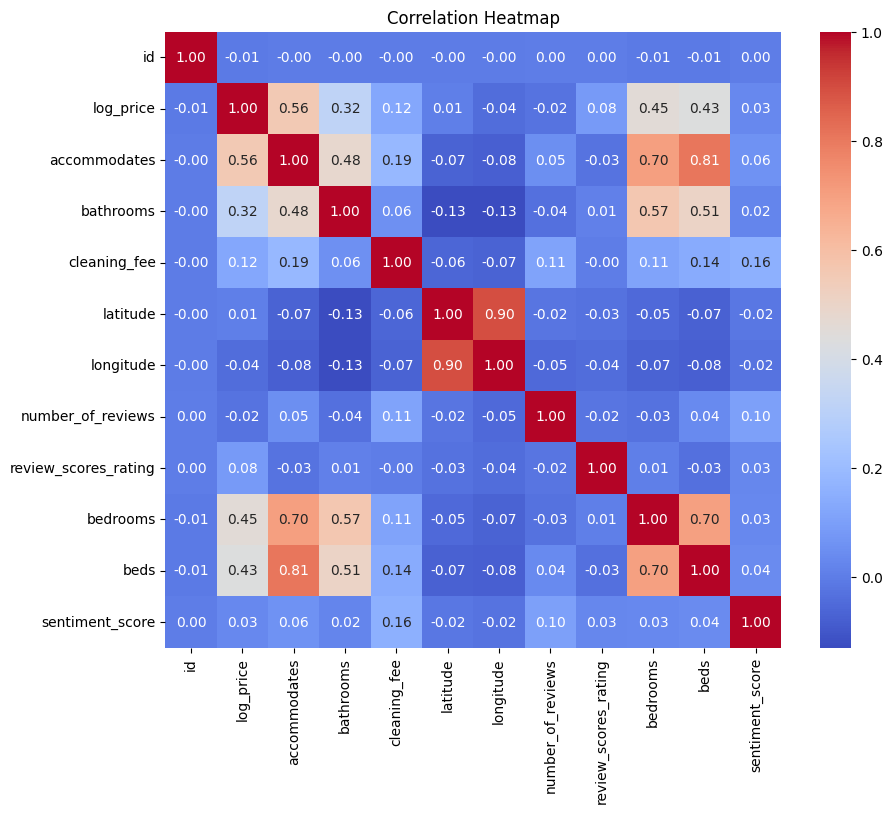

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

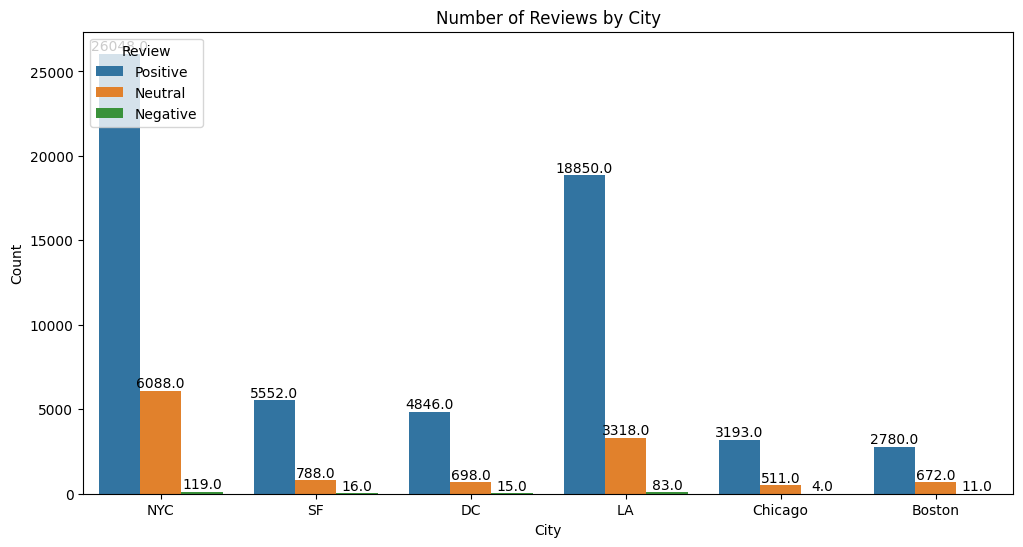

In [20]:
from collections import Counter
df = data.copy()
df = df[['city', 'description', 'review_scores_rating']]
df['sentiment'] = df['review_scores_rating'].apply(lambda x: 'Positive' if x >= 91 else 'Negative' if x < 60 else 'Neutral')


category_order = ['Positive', 'Neutral', 'Negative']

# Reorder the 'sentiment' column based on the category_order
df['sentiment'] = pd.Categorical(df['sentiment'], category_order)

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='city', hue='sentiment')
plt.title('Number of Reviews by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Review', loc='upper left')

# Add count values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height), (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

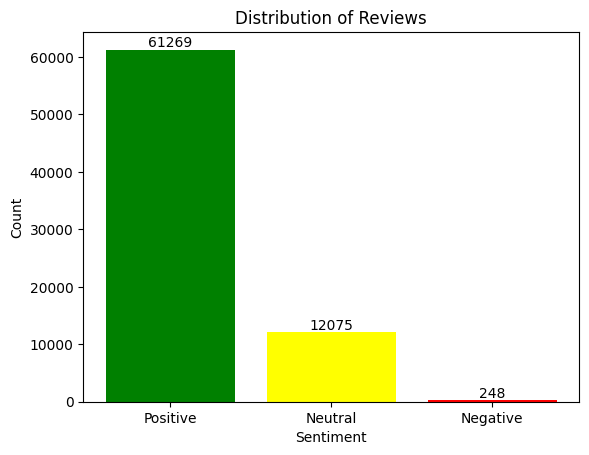

In [21]:
import matplotlib.pyplot as plt

positive_count = df[df['sentiment'] == 'Positive'].shape[0]
neutral_count = df[df['sentiment'] == 'Neutral'].shape[0]
negative_count = df[df['sentiment'] == 'Negative'].shape[0]


sentiments = ['Positive', 'Neutral', 'Negative']
counts = [positive_count, neutral_count, negative_count]
colors = ['green', 'yellow', 'red']

plt.bar(sentiments, counts, color=colors)

for i in range(len(sentiments)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Reviews')

plt.show()

#### Feature Engineering

In [23]:
rem_features = ["id", "zipcode", "thumbnail_url", "last_review", "host_since", "host_response_rate",
                "first_review", "neighbourhood", "name", 'amenities', 'description', 'host_has_profile_pic',]


data.drop(columns=rem_features, inplace=True)


In [24]:
categorical_features = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

binary_features = ['cleaning_fee',  'host_identity_verified', 'instant_bookable']

one_hot_features = binary_features + categorical_features
data = pd.get_dummies(data, columns=one_hot_features, prefix=one_hot_features)

In [25]:
columns_with_na = data.columns[data.isna().any()].tolist()

print("Columns with missing values:")
print(columns_with_na)

data = data.fillna(data.median())

Columns with missing values:
[]


#### Train_Test Split

In [26]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X_train = train_data.drop("log_price", axis=1)
y_train = train_data["log_price"]

X_test = test_data.drop("log_price", axis=1)
y_test = test_data["log_price"]


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58873 entries, 25260 to 15902
Data columns (total 69 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   accommodates                         58873 non-null  float64
 1   bathrooms                            58873 non-null  float64
 2   latitude                             58873 non-null  float64
 3   longitude                            58873 non-null  float64
 4   number_of_reviews                    58873 non-null  float64
 5   review_scores_rating                 58873 non-null  float64
 6   bedrooms                             58873 non-null  float64
 7   beds                                 58873 non-null  float64
 8   sentiment_score                      58873 non-null  float64
 9   cleaning_fee_False                   58873 non-null  uint8  
 10  cleaning_fee_True                    58873 non-null  uint8  
 11  host_identity_verified_f

#### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)


Root Mean Squared Error (RMSE): 0.4519649488400007
R-squared (R2): 0.575848299075908


#### Feature Importance (Linear Regression)

In [29]:
feature_importance = linreg.coef_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_df = importance_df.sort_values('Importance', ascending=False)

print(sorted_df)

                        Feature  Importance
63                  city_Boston   20.348333
67                     city_NYC   17.649891
65                      city_DC   14.821461
64                 city_Chicago    3.491753
39  property_type_Parking Space    0.923296
..                          ...         ...
31         property_type_Hostel   -0.682632
46      property_type_Treehouse   -0.687806
3                     longitude   -1.001378
66                      city_LA  -26.094450
68                      city_SF  -30.216989

[69 rows x 2 columns]


#### Ridge Regularization

In [30]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Root Mean Squared Error (RMSE): 0.4519649488400007
R-squared (R2): 0.575848299075908


In [31]:
feature_importance = ridge.coef_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_df = importance_df.sort_values('Importance', ascending=False)

print(sorted_df)

                      Feature  Importance
65                    city_DC    2.791491
63                city_Boston    2.751904
67                   city_NYC    2.735503
50  room_type_Entire home/apt    0.549393
42    property_type_Timeshare    0.456040
..                        ...         ...
27         property_type_Dorm   -0.543245
46    property_type_Treehouse   -0.551948
31       property_type_Hostel   -0.661891
66                    city_LA   -3.195053
68                    city_SF   -4.693339

[69 rows x 2 columns]


#### XGBoost

In [17]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
import pandas as pd
df = pd.read_csv("Airbnb_data.csv")
df = df.set_index('log_price')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

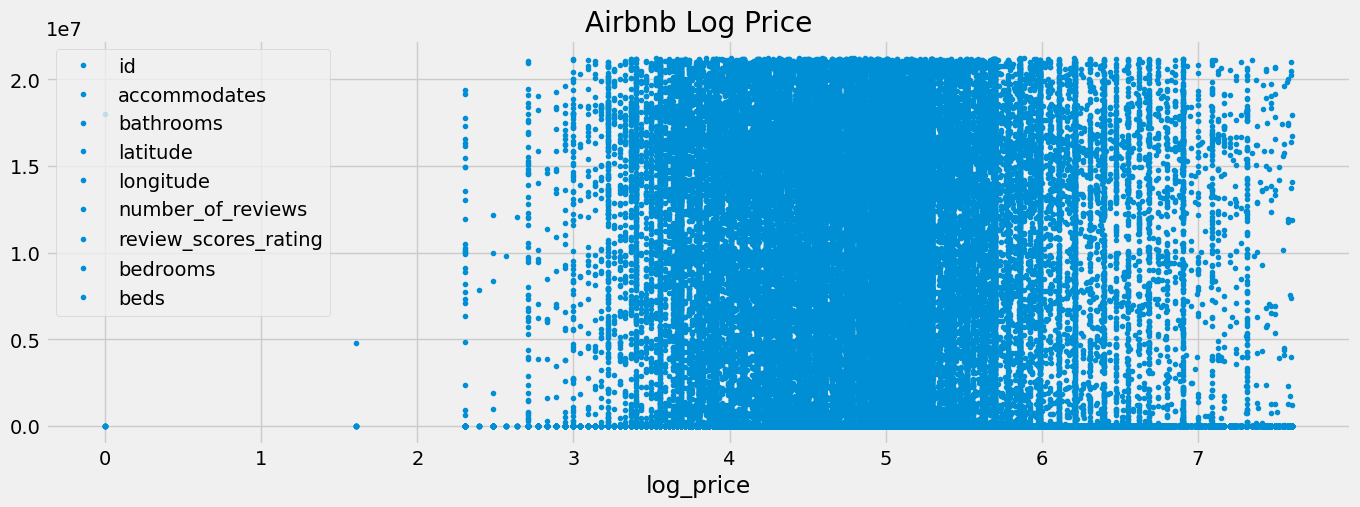

In [20]:
df.plot(style='.', 
        figsize=(15, 5), 
        color=color_pal[0], 
        title='Airbnb Log Price')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

NameError: name 'X' is not defined

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
df["property_type"] = le.fit_transform(df["property_type"])
df["room_type"] = le.fit_transform(df["room_type"])
df["amenities"] = le.fit_transform(df["amenities"])
df["bed_type"] = le.fit_transform(df["bed_type"])
df["cancellation_policy"] = le.fit_transform(df["cancellation_policy"])
df["city"] = le.fit_transform(df["city"])
df["description"] = le.fit_transform(df["description"])
df["first_review"] = le.fit_transform(df["first_review"])
df["host_has_profile_pic"] = le.fit_transform(df["host_has_profile_pic"])
df["host_identity_verified"] = le.fit_transform(df["host_identity_verified"])
df["host_response_rate"] = le.fit_transform(df["host_response_rate"])
df["host_since"] = le.fit_transform(df["host_since"])
df["instant_bookable"] = le.fit_transform(df["instant_bookable"])
df["last_review"] = le.fit_transform(df["last_review"])
df["name"] = le.fit_transform(df["name"])
df["neighbourhood"] = le.fit_transform(df["neighbourhood"])
df["thumbnail_url"] = le.fit_transform(df["thumbnail_url"])
df["zipcode"] = le.fit_transform(df["zipcode"])

NameError: name 'y_train' is not defined

In [23]:
model = XGBClassifier(max_depth=3,
                      subsample=0.8,
                      n_estimators=200,
                      learning_rate=0.05,
                      min_child_weight=1,
                      random_state=5,
                      reg_alpha=0,
                      reg_lambda=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
from sklearn.metrics import accuracy_score
print('Train accuracy', accuracy_score(y_train, y_train_predict))
print('Test accuracy', accuracy_score(y_test, y_predict))

NameError: name 'X_train' is not defined

In [24]:
model = XGBClassifier(max_depth=3,
                      subsample=0.8,
                      n_estimators=200,
                      learning_rate=0.05,
                      min_child_weight=1,
                      random_state=5,
                      reg_alpha=0,
                      reg_lambda=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
from sklearn.metrics import classification_report
print('Train accuracy', classification_report(y_train, y_train_predict))
print('Test accuracy', classification_report(y_test, y_predict))

NameError: name 'X_train' is not defined

In [25]:
#build a pipeline of training
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBClassifier(random_state=0))
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [26]:
#set up hyperparameter tuning
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode': Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=0)